# Follow Mother


In this notebook I discuss the concepts and methodology me and my team used to make the smart chair follow a certain object based on its color, technically this problem is well known as color tracking.

We can divide our task into mainly 3 tasks
* Detect the object by its color
* Locate the object in the image
* Move the chair


### Install & Import necessary libraries

In [1]:
# uncomment the line associated with the library you don't have
#!pip3 install prettytable -q
#!pip3 install numpy -q
#!pip3 install matplotlib

In [10]:
from utils import *

# Locating the object in the image

I will start with the easiest one which is locating the object in the image, specifically speaking locating the center of the object. The problem is that we only know the object color, how can we use this to get the center of the object in the image?

We used a mathematical definition called centroid. According to [Wikipedia](https://en.wikipedia.org/wiki/Centroid) 

`The centroid or geometric center of a plane figure is the arithmetic mean position of all the points in the figure.`

This is how we calculated the centroid of our object, after we set the range for the selected color, loop on all the pixels in the image and check whether it's in the range or not.
If it's in the range then most probably this is our object, we then sum all the x coordinates of these pixels and divide them by number of matching pixels and this our X coordinate of the centroid!

`we are not interested in Y coordinate of the centroid because we are not going to fly the chair!`

<img src="./imgs/centroid.png" alt="Centroid" style="width:200px;">

we found that this approach is good in situations where there are more than one object with the selected color ( which by the way shouldn't happen often since the color should be unique, but just in case there were another object with the same color),

then the calculated centroid would be somewhere between the two objects, this is much better than picking a random object out of them and follow it, since this frame won't last forever, probably it would last for few seconds or something so moving to somewhere between the objects gives the chair the chance to wait for the fake colored object to disappear in the next frames and don't get the chair direction much affected by it.

# Color Detection

This was a challenging task as there were many options for color models such as RGB, HSL, HSV, CMY and more, kindly find the complete list at [WikiPedia](https://en.wikipedia.org/wiki/Color_model), and each has its own way to set the range of a color and the difficulty varies from one model to another, we chose HSL model but first let's talk a little about HSL color model before we discuss our approach for setting the range.

### HSL Color Model [ Hue, Saturation, Lightness]


<img src="./imgs/hsl.png" alt="HSL Color Space" style="width:400px">
<br>

* **Hue**: A value we can interpret in the color space as the angle that determines the color
* **Saturation**: A value that determines how pure the hue is. We can interpret it in the color space as the radius.
* **Lightness**: A value that can be interpreted as how much the amount of white/black mixed with the color.

Picking a value for Lightness (L) cuts the cylinder in a circle (a.k.a color wheel)

<img src="./imgs/hue.jpg" alt="color wheel" style="width:300px;">
where you can choose Hue (the color) and saturation (Color Pureness)

## Our Approach

So the task is to track an object by its color. Using HSL color model this can be done by setting a certain value for HUE to pick a color which you can think of on the level of the cylinder as cutting a rectangular, but we will not consider the whole rectangular, why?

This is the rectangular we get with hue = 117

<img src="./imgs/algo.jpeg" alt="Color Range" style="width:300px;">

As you can see there are regions in the rectangular that are purely black, grey, white, and others that are gray-green! so we shouldn't consider the whole rectangular area, instead we should take the subarea where the degree of the color is accepted, this is the left half of the ellipse in the image

But since the pixels have three varaibles H, S, L that represent the color not only S, L (ellipse axes) we should include Hue in our calculations so we end up with an ellipsoid

Now with the formula for the ellipsoid covering the color range we set, we can check whether a certain pixel in an image is colored with our unique color by just checking if its hsl values satisfy the formula or not!

This reduces the big difficult task into two easy small subtasks:
1. Picking the right hue value to represent the color
2. Getting the right formula for the ellipsoid to cover the color range.

Below is a GIF illustrating the output of the algorithm, when a pixel is found to match the required color (which is green in this demo) it's recolored with white just for illustration.<br>
It's clear that the color is successfully detected by the algorithm!

<img src="./imgs/Img_scanning.gif" alt="Object Detection" style="width:200px;">

[Tool used](https://ezgif.com/speed/ezgif-1-5d7e165eb3b4.gif)

# Testing

## Traffic Light Test

Image shape is (225, 225, 3)


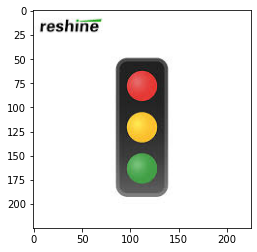

In [11]:
img = display_image("./imgs/traffic.jpeg")

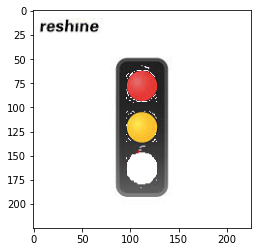

+------------------+----------+--------------------+
| #Matching Pixels | X Center |    Obj X Center    |
+------------------+----------+--------------------+
|       1014       |  112.5   | 108.72287968441815 |
+------------------+----------+--------------------+


In [12]:
detected = get_centroid(img)

## Green Line Test

Image shape is (604, 804, 3)


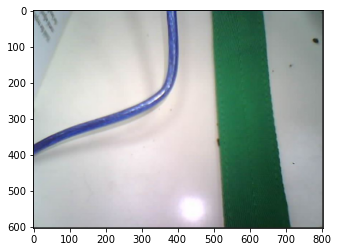

In [13]:
img = display_image("./imgs/test.JPG")

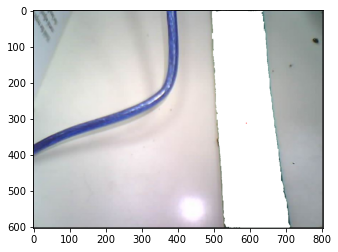

+------------------+----------+-------------------+
| #Matching Pixels | X Center |    Obj X Center   |
+------------------+----------+-------------------+
|      94958       |  402.0   | 591.7774279154995 |
+------------------+----------+-------------------+


In [14]:
get_centroid(img)

## Two Objects

Image shape is (612, 612, 3)


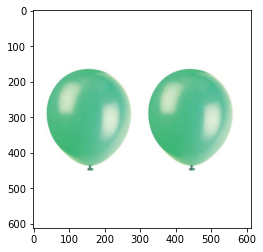

In [7]:
img = display_image("./imgs/2green.jpeg")

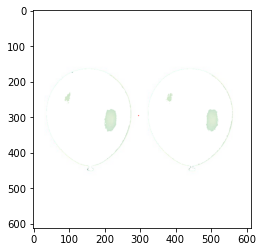

+------------------+----------+-------------------+
| #Matching Pixels | X Center |    Obj X Center   |
+------------------+----------+-------------------+
|      94969       |  306.0   | 296.6795691225558 |
+------------------+----------+-------------------+


In [8]:
get_centroid(img)

colorPicker = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    disabled=False
)

def track_color(change):
    hexa = change['new']
    r,g,b = tuple([int(hexa[1:3], 16), int(hexa[3:5], 16), int(hexa[5:7], 16)])
    
    print(rgb_to_hsl(r,g,b))


colorPicker.observe(track_color, type='change', names = 'value')

display(colorPicker)

```{toggle}
Some hidden toggle content!

![](../images/cool.jpg)
```

h4 = (H - 117) / 60
s4 = (S - 100) / 90
l2 = (L - 45) / 42
return (h4*h4*h4*h4 + s4*s4*s4*s4 + l2*l2*l2*l2 < 1)

In [ ]:
```{toggle}
int_range = widgets.IntSlider()
output2 = widgets.Output()

display(int_range, output2)

def on_value_change(change):
    with output2:
        print(change['new'])

int_range.observe(on_value_change, names='value')
```